# Still not enough

The performance of CNN are limited by the quantity of data used for training. 

Data augmentation is a common technique to increase this quantity without collecting more data. In fact, by applying transformations such as rotations, translations, ... to the training data, new examples are created and can be used for training.

It helps the network to be invariant by these transformations.

Let see how to do it in keras.

In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import mnist_reader
from utils.validation import validation_report

Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

N = X_train.shape[0]
batch_size = 32

n_batch = int(N/batch_size)

from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

In [2]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=0.1,
    channel_shift_range=0.01,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    )

Using TensorFlow backend.


In [5]:
datagen.fit(X_train.reshape(-1, 28, 28, 1))

In [6]:
iterator = datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train_ohe, batch_size=32)

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


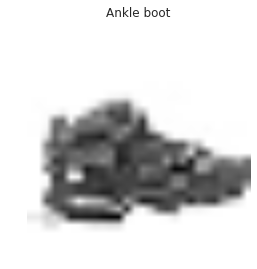

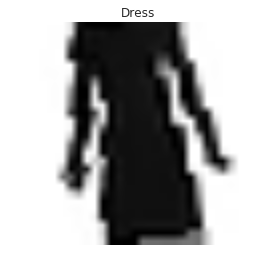

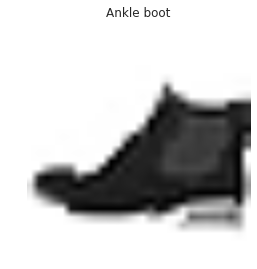

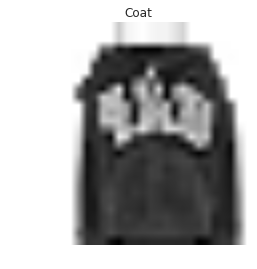

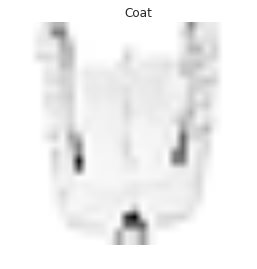

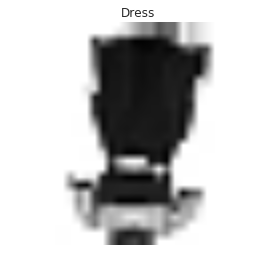

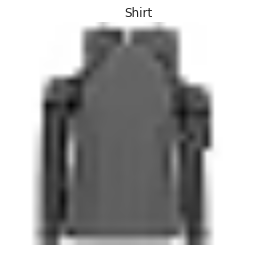

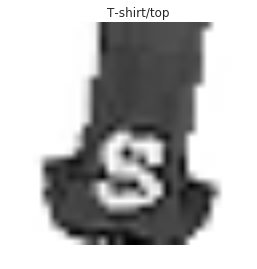

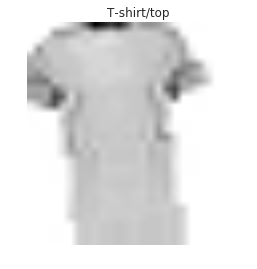

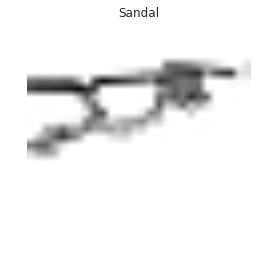

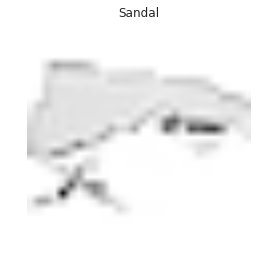

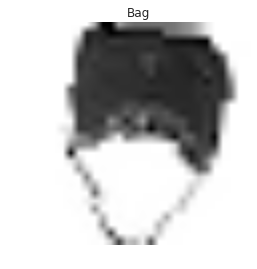

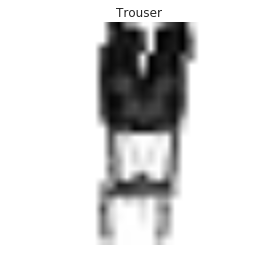

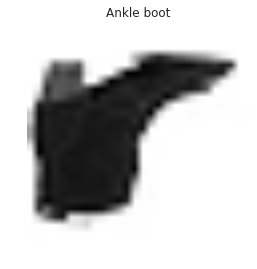

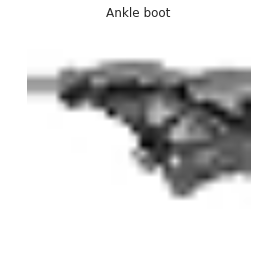

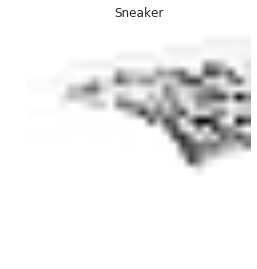

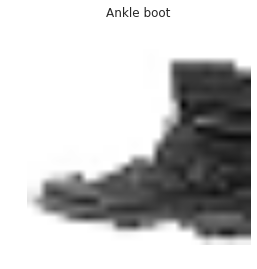

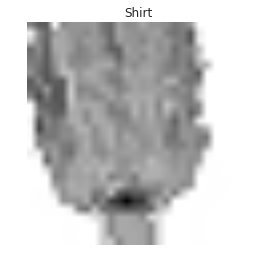

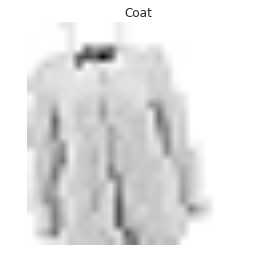

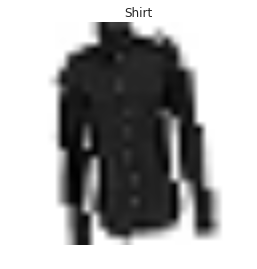

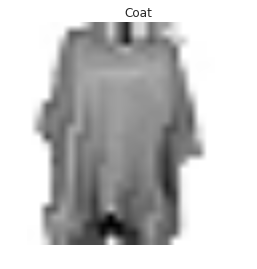

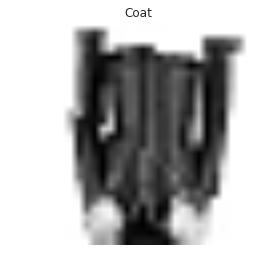

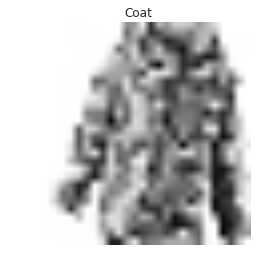

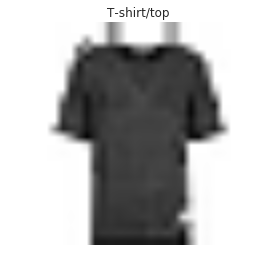

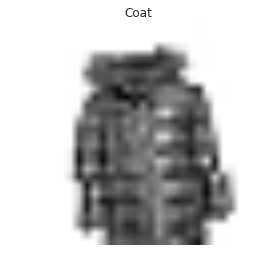

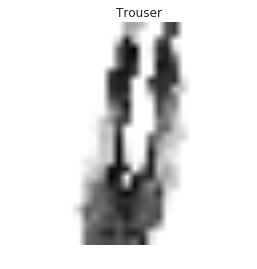

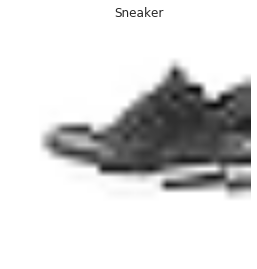

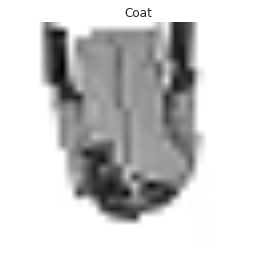

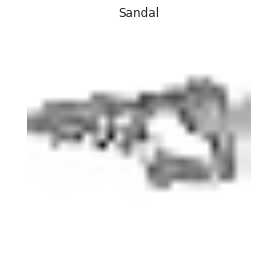

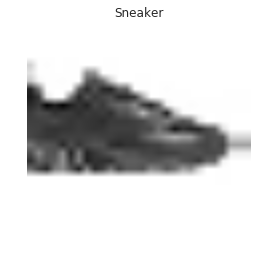

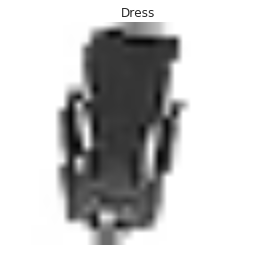

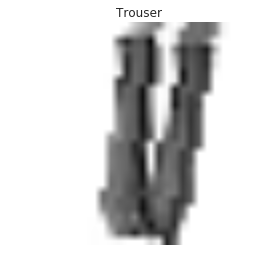

In [7]:
xbatch, ybatch = iterator.next()

for x, y in zip(xbatch, ybatch):
    plt.figure()
    plt.imshow(x[:,:,0], cmap="Greys")
    plt.title(Labels[y.argmax()])
    plt.axis("off")

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization
import keras.metrics as metrics

dropout_rate=0.1

model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_rate))
model.add(Dense(10, activation='softmax'))


def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

# Change decay for better results

# lr: 1e-3, decay: 0

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, decay=0., nesterov=False),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [20]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(iterator,
                    steps_per_epoch=n_batch, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 66s - loss: 1.5162 - categorical_accuracy: 0.4732 - top3_acc: 0.7663    - ETA: 4s - loss
Epoch 2/5
1875/1875 [==============================] - 67s - loss: 1.1021 - categorical_accuracy: 0.6145 - top3_acc: 0.8892    - ETA: 6s - loss: 1.1104 - categorical_accuracy: 0.6123 - to
Epoch 3/5
1875/1875 [==============================] - 68s - loss: 0.9836 - categorical_accuracy: 0.6532 - top3_acc: 0.9124    - ETA: 
Epoch 4/5
1875/1875 [==============================] - 69s - loss: 0.9194 - categorical_accuracy: 0.6734 - top3_acc: 0.9241    
Epoch 5/5
1875/1875 [==============================] - 70s - loss: 0.8756 - categorical_accuracy: 0.6864 - top3_acc: 0.9329    


In [ ]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [21]:
validation_report(test_data=X_test.reshape(-1, 28, 28, 1),
                 test_label=y_test,
                 model=model,
                 names=Labels)

Accuracy: 
0.7321



Confusion matrix: 
[[792   3  12 108   2   2 239   0  10   1]
 [  8 902   1  34   1   0   3   0   9   0]
 [ 58  14 835  63 446   0 412   0  27   0]
 [ 39  43   5 666  38   4  20   0   4  10]
 [ 15   7  47  58 408   0  80   0  10   1]
 [ 13   0   3   1   3 787   8  20  18   3]
 [ 60  25  74  65  87   0 209   0   3   0]
 [  1   0   0   0   0 141   0 867   6  37]
 [ 14   6  23   5  15  13  29   4 909   2]
 [  0   0   0   0   0  53   0 109   4 946]]



             precision    recall  f1-score   support

T-shirt/top       0.79      0.68      0.73      1169
    Trouser       0.90      0.94      0.92       958
   Pullover       0.83      0.45      0.58      1855
      Dress       0.67      0.80      0.73       829
       Coat       0.41      0.65      0.50       626
     Sandal       0.79      0.92      0.85       856
      Shirt       0.21      0.40      0.27       523
    Sneaker       0.87      0.82      0.85      1052
        Bag       0.91      0.89      0.90      